In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import unicodedata
from sklearn.feature_extraction import DictVectorizer as DV

In [93]:
%matplotlib inline
sns.set(color_codes=True)

In [100]:
def json_load_byteified(file_handle):
    return _byteify(
        json.load(file_handle, object_hook=_byteify),
        ignore_dicts=True
    )

def json_loads_byteified(json_text):
    return _byteify(
        json.loads(json_text, object_hook=_byteify),
        ignore_dicts=True
    )

def _byteify(data, ignore_dicts = False):
    # if this is a unicode string, return its string representation
    if isinstance(data, unicode):
        return data.encode('utf-8')
    # if this is a list of values, return list of byteified values
    if isinstance(data, list):
        return [ _byteify(item, ignore_dicts=True) for item in data ]
    # if this is a dictionary, return dictionary of byteified keys and values
    # but only if we haven't already byteified it
    if isinstance(data, dict) and not ignore_dicts:
        return {
            _byteify(key, ignore_dicts=True): _byteify(value, ignore_dicts=True)
            for key, value in data.iteritems()
        }
    # if it's anything else, return it in its original form
    return data

In [125]:
with open('fav_stories_metadata.json') as data_file:    
    data = json_load_byteified(data_file)
data[0]

{'author_name': "I'mjusttryingtofindmyway",
 'author_url_relative': '/u/5380086/I-mjusttryingtofindmyway',
 'reviews_url_relative': '/r/11697391/',
 'story_chapter_count': '60',
 'story_complete': 'N',
 'story_crossover': 'N',
 'story_end_url_relative': '/s/11697391/60/Percy-Jackson-and-the-Game',
 'story_favourite_count': 4841,
 'story_follow_count': 5098,
 'story_genre': 'Fantasy/Adventure',
 'story_language': 'English',
 'story_last_updated_date': '1/31',
 'story_main_characters': ['Percy J.', 'Thalia G.', 'Artemis'],
 'story_name': 'Percy Jackson and the Game',
 'story_parent': 'Percy Jackson and the Olympians',
 'story_published_date': '12/28/2015',
 'story_rating': 'M',
 'story_review_count': '7041',
 'story_start_url_relative': '/s/11697391/1/Percy-Jackson-and-the-Game',
 'story_summary': 'Percy is given the gift of the Gamer turning his life into a video game with levels, dungeons and skill points. Now Percy, armed with this amazing ability, sets out to prove himself to the wor

In [132]:
for i, e in enumerate(data):
    for key in e:
        if type(data[i][key]) is list:
            data[i][key] = '--'.join(data[i][key])
data[0]

{'author_name': "I'mjusttryingtofindmyway",
 'author_url_relative': '/u/5380086/I-mjusttryingtofindmyway',
 'reviews_url_relative': '/r/11697391/',
 'story_chapter_count': '60',
 'story_complete': 'N',
 'story_crossover': 'N',
 'story_end_url_relative': '/s/11697391/60/Percy-Jackson-and-the-Game',
 'story_favourite_count': 4841,
 'story_follow_count': 5098,
 'story_genre': 'Fantasy/Adventure',
 'story_language': 'English',
 'story_last_updated_date': '1/31',
 'story_main_characters': 'Percy J.--Thalia G.--Artemis',
 'story_name': 'Percy Jackson and the Game',
 'story_parent': 'Percy Jackson and the Olympians',
 'story_published_date': '12/28/2015',
 'story_rating': 'M',
 'story_review_count': '7041',
 'story_start_url_relative': '/s/11697391/1/Percy-Jackson-and-the-Game',
 'story_summary': 'Percy is given the gift of the Gamer turning his life into a video game with levels, dungeons and skill points. Now Percy, armed with this amazing ability, sets out to prove himself to the world of 

In [148]:
vectorizer = DV( sparse = False )
data_v = vectorizer.fit_transform(data)
data_v.shape
vectorizer.get_feature_names()

['author_name=Agni',
 'author_name=Akallas von Aerok',
 'author_name=Akraa',
 'author_name=AlexDnD',
 'author_name=AlphaDelta1001',
 'author_name=Angel of Snapdragons',
 'author_name=BitterIcing',
 'author_name=BonesBoy15',
 'author_name=BrotherMaynard12533',
 'author_name=CHAOS AND TRANQUILITY',
 'author_name=CaptainLaughs',
 'author_name=CasualGamer',
 'author_name=Champygnakx',
 'author_name=Chooser of the Slain',
 'author_name=Clell65619',
 'author_name=Concept101',
 'author_name=ContraBardus',
 'author_name=Corruptmonk',
 'author_name=CrazedChakra101',
 'author_name=Crunchysunrises',
 'author_name=Darkcloudalpha',
 'author_name=DarknessEnthroned',
 'author_name=Darth Malleus',
 'author_name=DarthValgaav',
 'author_name=Darthemius',
 'author_name=DebsTheSlytherinSnapefan',
 'author_name=Digital Skitty',
 'author_name=Digitize27',
 'author_name=Dinner',
 'author_name=DisobedienceWriter',
 'author_name=E4mj',
 'author_name=EdStargazer',
 'author_name=Eilyfe',
 'author_name=Fan of Fan

In [146]:
df = pd.DataFrame(data)
dfv = pd.DataFrame(data)
del dfv['author_url_relative']
del dfv['reviews_url_relative']
del dfv['story_end_url_relative']
del dfv['story_start_url_relative']
del dfv['story_summary']
# dfv.head()
pd.DataFrame(data_v).head()

,0,1,2,3,4,5,6,7,8,9,...,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,720488
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,122773
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,110493
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,317389
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,107966


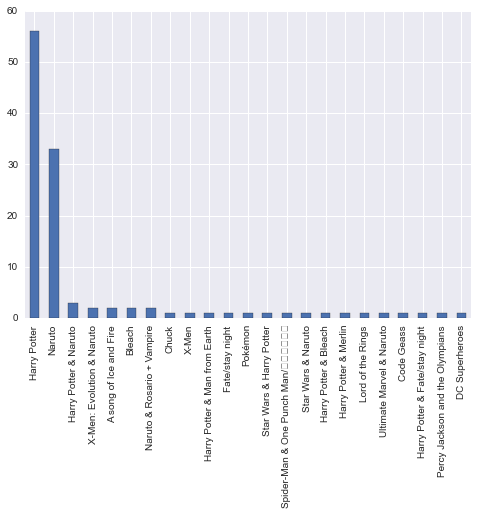

In [38]:
df.story_parent.value_counts().plot(kind='bar')

In [29]:
print(df.story_parent)

0        Percy Jackson and the Olympians
1                                  X-Men
2                           Harry Potter
3                           Harry Potter
4                                 Naruto
5                           Harry Potter
6                 A song of Ice and Fire
7                                 Naruto
8                                 Naruto
9                           Harry Potter
10              Star Wars & Harry Potter
11                       Fate/stay night
12                                Naruto
13                                Bleach
14                                Naruto
15                                Naruto
16                A song of Ice and Fire
17                                Naruto
18                                Naruto
19                          Harry Potter
20                        DC Superheroes
21     Spider-Man & One Punch Man/ワンパンマン
22                          Harry Potter
23                                Naruto
24        Harry 